News Mood

Observations:
(1)  Data from target news feeds includes retweeted items.  I considered trying to weed these out, but as a standard in Twitter, anyone following or browsing these news feeds would see their retweets so it seemed logical to include them in the sentiment analysis.  Just a note that many of the tweets analyzed were not written by the news feed firsthand, but were actively promoted by them.
(2)  VaderSentiment is an analysis tool that attempts to assign a value to emotional words.  While there is a great deal of science behind this, I find it an interesting exercise to apply this method to news (which is assumed to be fact-based and objective).  For example, the sentence "Girl murdered by guy" is compunded by VaderSentiment to be a negative sentence (-0.66).  However, the sentence "Wonderful girl murdered by smart guy" is compunded to be a positive sentence (0.25).  In either case, the story is about a murder and the adjectives added to make it more eye-catching to a reader don't actually change the facts.  So it seems what our data is most likely representing is the "spinning" of the news story more than the actual content of the story itself, and that negative adjectives are a stronger "seller" than positive adjectives, considering the predominently negative sentiments across news feeds.

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import seaborn as sns
import datetime as datetime
import matplotlib.patches as mpatches

# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import consumer_key, consumer_secret, access_token, access_token_secret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
now = datetime.datetime.now()
now = now.strftime("%m-%d-%Y")

In [3]:
# Target Account
target_terms = ("@BBCWorld", "@nytimes", "@CBSNews", "@CNN", "@FoxNews")

# Variables for holding sentiments
sentiments = []

# Start basic print log
print("Beginning API call...")

for target in target_terms:
    # Set counter
    counter = 1
    # Get 100 tweets from each user feed
    public_tweets = api.user_timeline(target, count = 100)

    # Loop through all tweets 
    for tweet in public_tweets:

        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        name  = target
        text = tweet["text"]
        
        # Add sentiments for each tweet into an array
        sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Account Name": name,
                           "Text": text,
                           "Tweets Ago": counter
                          })
        
        # Add to counter 
        counter = counter + 1
print("API call complete")

Beginning API call...
API call complete


In [13]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd["Date"] = (sentiments_pd["Date"].str.split().str[1])+"-"+(sentiments_pd["Date"].str.split().str[2])+"-"+(sentiments_pd["Date"].str.split().str[5])+" "+(sentiments_pd["Date"].str.split().str[3])
sentiments_pd.sample(10)

,Account Name,Compound,Date,Negative,Neutral,Positive,Text,Tweets Ago
389,@CNN,0.4019,Mar-30-2018 11:10:08,0.856,0.000,0.144,She chronicled her life on Instagram: her drea...,90
437,@FoxNews,0.4588,Mar-30-2018 20:30:31,0.833,0.000,0.167,Twin brothers in Michigan welcome newborns on ...,38
224,@CBSNews,0.4215,Mar-30-2018 19:10:30,0.843,0.000,0.157,"Sister Jean, Loyola-Chicago's adored 98-year-o...",25
219,@CBSNews,0.0000,Mar-30-2018 21:20:01,1.000,0.000,0.000,"Last year, LaGuardia Airport had the highest r...",20
240,@CBSNews,-0.6705,Mar-30-2018 15:35:01,0.769,0.231,0.000,American service member killed in Syria roadsi...,41
139,@nytimes,-0.3400,Mar-30-2018 17:38:03,0.772,0.158,0.070,RT @nytimesworld: No other country was as effi...,40
80,@BBCWorld,0.0000,Mar-29-2018 13:02:23,1.000,0.000,0.000,David Shulkin: Sacked secretary in parting sho...,81
388,@CNN,0.1280,Mar-30-2018 11:16:35,0.651,0.130,0.219,"If you want to stop Putin, follow the money, s...",89
220,@CBSNews,-0.6705,Mar-30-2018 21:00:02,0.780,0.220,0.000,Fourteen Palestinians killed in clashes with I...,21
24,@BBCWorld,-0.7506,Mar-30-2018 12:04:18,0.484,0.516,0.000,Spy poisoning: Russia expels 'unfriendly' West...,25


In [22]:
#Export to csv file
sentiments_pd.to_csv("NewsMood.csv", encoding='utf-8', index = False)

In [5]:
# Collect data for plots.  There is probably a simpler way to do this, but I like lists because I know how to maipulate
# them for the next step and I wanted the index to remain as is.

BBC_x = []
NYT_x = []
CBS_x = []
CNN_x = []
FOX_x = []
BBC_y = []
NYT_y = []
CBS_y = []
CNN_y = []
FOX_y = []

# Seperate data in DataFrame by target_terms.  Based on our first loop's structure, the index will do this for us.

for index, row in sentiments_pd.iterrows():
    if index <= 99:
        BBC_y.append(sentiments_pd.iloc[index]["Compound"])
        BBC_x.append(sentiments_pd.iloc[index]["Tweets Ago"])
    elif index >= 100 and index <=199:
        NYT_y.append(sentiments_pd.iloc[index]["Compound"])
        NYT_x.append(sentiments_pd.iloc[index]["Tweets Ago"])
    elif index >= 200 and index <= 299:
        CBS_y.append(sentiments_pd.iloc[index]["Compound"])
        CBS_x.append(sentiments_pd.iloc[index]["Tweets Ago"])
    elif index >= 300 and index <= 399:
        CNN_y.append(sentiments_pd.iloc[index]["Compound"])
        CNN_x.append(sentiments_pd.iloc[index]["Tweets Ago"])
    elif index >= 400 and index <= 499:
        FOX_y.append(sentiments_pd.iloc[index]["Compound"])
        FOX_x.append(sentiments_pd.iloc[index]["Tweets Ago"])

In [6]:
# Current plot data is in order of most recent tweet to 100 tweets ago, I want to display them in the reverse order

BBC_x = BBC_x[::-1]
BBC_y = BBC_y[::-1]
NYT_x = NYT_x[::-1]
NYT_y = NYT_y[::-1]
CBS_x = CBS_x[::-1]
CBS_y = CBS_y[::-1]
CNN_x = CNN_x[::-1]
CNN_y = CNN_y[::-1]
FOX_x = FOX_x[::-1]
FOX_y = FOX_y[::-1]

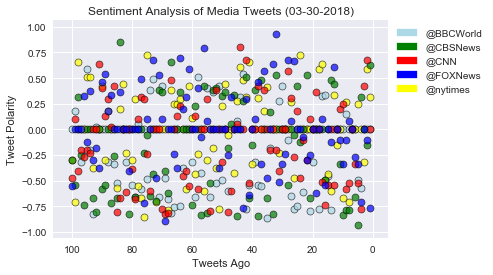

In [7]:
# Set background
sns.set()

# Set data and plot for each target_term
x = BBC_x
y = BBC_y
plt.scatter(x,y,c="lightblue",alpha = 0.7,linewidth=0.7,edgecolor="black")

x = NYT_x
y = NYT_y
plt.scatter(x,y,c="yellow",alpha = 0.7, linewidth=0.7,edgecolor="black")


x = CBS_x
y = CBS_y
plt.scatter(x,y,c="green",alpha = 0.7,linewidth=0.7,edgecolor="black")

x = CNN_x
y = CNN_y
plt.scatter(x,y,c="red",alpha = 0.7,linewidth=0.7,edgecolor="black")

x = FOX_x
y = FOX_y
plt.scatter(x,y,c="blue",linewidth=0.7,alpha = 0.7,edgecolor="black")

# Add plot aesthetics
plt.title("Sentiment Analysis of Media Tweets ("+now+")")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
red_patch = mpatches.Patch(color='red', label='@CNN')
lightblue_patch = mpatches.Patch(color='lightblue', label='@BBCWorld')
yellow_patch = mpatches.Patch(color='yellow', label='@nytimes')
green_patch = mpatches.Patch(color='green', label='@CBSNews')
blue_patch = mpatches.Patch(color='blue', label='@FOXNews')
plt.legend(handles=[lightblue_patch,green_patch,red_patch,blue_patch,yellow_patch],loc="upper left", bbox_to_anchor=(1,1))

# Invert axis to match reversed time order
plt.gca().invert_xaxis()

set_xlim = (100,1)
set_ylim = (-1,1)

plt.show()

In [14]:
# Prepare DataFrane for average sentiments
bar_pd = sentiments_pd.groupby("Account Name").mean()
bar_pd = bar_pd.reset_index()
bar_pd.head()

,Account Name,Compound,Negative,Neutral,Positive,Tweets Ago
0,@BBCWorld,-0.179185,0.79130,0.15308,0.05562,50.5
1,@CBSNews,-0.135677,0.84652,0.10631,0.04717,50.5
2,@CNN,-0.104925,0.84570,0.09386,0.06044,50.5
3,@FoxNews,-0.002444,0.82574,0.09034,0.08392,50.5
4,@nytimes,-0.012237,0.86651,0.07013,0.06336,50.5


(-0.2, 0.05)

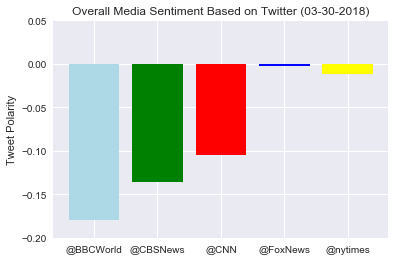

In [20]:
# Set data
y = bar_pd["Compound"]
x = bar_pd["Account Name"]

# Set aesthetics and plot
colors = ["lightblue","green","red","blue","yellow"]
plt.bar(x,y, color=colors)
plt.title("Overall Media Sentiment Based on Twitter ("+now+")")
plt.ylabel("Tweet Polarity")
plt.ylim(-0.2,0.05)